In [166]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv('C://Users//Pratinav jinwal//OneDrive//Desktop//Capstone Project//Capstone project zipped data//02_who male female.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78373 entries, 0 to 78372
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Entity                                       78373 non-null  object 
 1   Code                                         73589 non-null  object 
 2   Year                                         78373 non-null  int64  
 3   Age-standardized suicide rate - Sex: male    3880 non-null   float64
 4   Age-standardized suicide rate - Sex: female  3880 non-null   float64
 5   Population                                   78165 non-null  float64
 6   Continent                                    285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ MB


In [170]:
df.head(5)

,Entity,Code,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2000,8,8,19542986,NaN
2,Afghanistan,AFG,2001,8,8,19688634,NaN
3,Afghanistan,AFG,2002,8,8,21000258,NaN
4,Afghanistan,AFG,2003,8,8,22645136,NaN


In [173]:
df.columns = df.columns.str.strip()

In [174]:
df.shape

(78373, 7)

In [175]:
df.isnull().sum()

Entity                                             0
Code                                            4784
Year                                               0
Age-standardized suicide rate - Sex: male      74493
Age-standardized suicide rate - Sex: female    74493
Population                                       208
Continent                                      78088
dtype: int64

In [176]:
# Removing the Null values from column 'Age-standardized suicide rate - Sex: male'

df_cleaned = df.dropna(subset=['Age-standardized suicide rate - Sex: male'])
print(df_cleaned.isnull().sum())

Entity                                            0
Code                                            200
Year                                              0
Age-standardized suicide rate - Sex: male         0
Age-standardized suicide rate - Sex: female       0
Population                                      160
Continent                                      3697
dtype: int64


In [177]:
# Reset the index 
df_cleaned.reset_index(drop=True, inplace=True)

#checking the year column 
print(df_cleaned['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]


In [178]:
# Creating a copy of the DataFrame
df_cleaned = df_cleaned.copy()

# Renaming 'Entity' to 'Country'
df_cleaned.rename(columns={'Entity': 'Country'}, inplace=True)

# Removing 'World' from 'Country' column
df_cleaned_v2 = df_cleaned[df_cleaned['Country'] != 'World']

# Removing column code as country code.
df_cleaned_v2= df_cleaned_v2.drop('Code', axis=1)


df_cleaned_v2

,Country,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,Afghanistan,2000,8,8,19542986,NaN
1,Afghanistan,2001,8,8,19688634,NaN
2,Afghanistan,2002,8,8,21000258,NaN
3,Afghanistan,2003,8,8,22645136,NaN
4,Afghanistan,2004,8,8,23553554,NaN
...,...,...,...,...,...,...
3875,Zimbabwe,2015,47,19,14154937,Africa
3876,Zimbabwe,2016,44,18,14452705,NaN
3877,Zimbabwe,2017,41,15,14751101,NaN
3878,Zimbabwe,2018,39,13,15052191,NaN


In [179]:
# Creating a DataFrame for the year 2019
df_2019 = df_cleaned_v2[df_cleaned_v2['Year'] == 2019]

# Group by country and sort by descending population
grouped_df = df_2019.groupby('Country', as_index=False).agg({'Population': 'max'}).sort_values(by='Population', ascending=False)

# Filter out the outliers
grouped_df = grouped_df[~grouped_df['Country'].isin(['Africa', 'Europe','Americas','High-income','Eastern Mediterranean','Lower-middle-income','Low-income','South-East Asia','Upper-middle-income','Western Pacific'])]

# Print the resulting DataFrame
print(grouped_df.head(5))

           Country  Population
36           China  1421864064
80           India  1383112064
182  United States   334319680
81       Indonesia   269582880
132       Pakistan   223293280


In [180]:
# Select top 5 countries from the dataframe
top_5_countries = grouped_df.head(5)['Country'].tolist()

In [181]:
# Assuming top_5_countries is a list of country names
top_5_countries_df = pd.DataFrame({'Country': top_5_countries})

# Merge df_cleaned_v2 and top_5_countries_df
result_df = pd.merge(df_cleaned_v2, top_5_countries_df, on='Country', how='inner')

# Print the resulting DataFrame
print(result_df.shape)

(100, 6)


In [182]:
result_df.to_excel('output_file.xlsx', index=False)

In [185]:
result_df

,Country,Year,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Population,Continent
0,China,2000,15,14,1264099072,NaN
1,China,2001,14,13,1272739584,NaN
2,China,2002,14,11,1280926080,NaN
3,China,2003,15,12,1288873344,NaN
4,China,2004,15,12,1296816768,NaN
...,...,...,...,...,...,...
95,United States,2015,20,6,324607776,North America
96,United States,2016,21,6,327210208,NaN
97,United States,2017,23,6,329791232,NaN
98,United States,2018,22,7,332140032,NaN


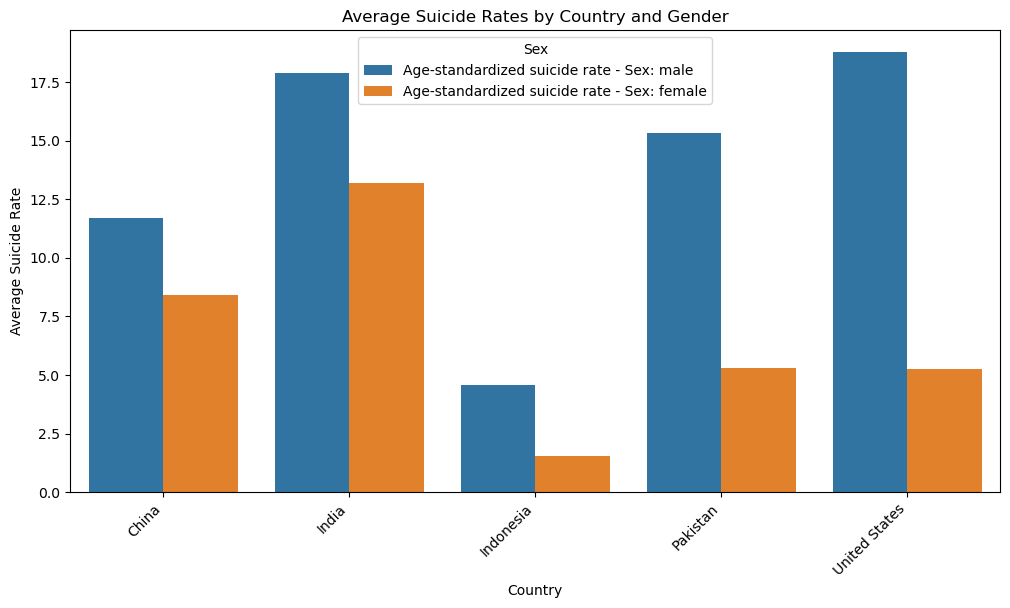

In [195]:
# Calculate the average suicide rates by grouping by 'Country'
average_suicide_rates = result_df.groupby('Country').agg({
    'Age-standardized suicide rate - Sex: male': 'mean',
    'Age-standardized suicide rate - Sex: female': 'mean'
}).reset_index()

# Melt the DataFrame to make it suitable for plotting
final_df = pd.melt(average_suicide_rates, id_vars='Country', var_name='Sex', value_name='Average Suicide Rate')

# Create a barplot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Average Suicide Rate', hue='Sex', data=final_df)
plt.title('Average Suicide Rates by Country and Gender')
plt.xticks(rotation=45, ha='right')
plt.show()